<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/DL02_faceRecogintion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the dataset

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
# print(os.listdir('/content/drive/MyDrive/yalefaces'))
path='/content/drive/MyDrive/yalefaces'
print(os.listdir(path))


['.DS_Store', 'train', 'test']


##Preprocessing the images

In [4]:
def get_image_data():
  paths=[os.path.join(path+'/train',f) for f in os.listdir(path+'/train')]
  # print(paths)
  faces=[]
  ids=[]
  for pathh in paths:
    image=Image.open(pathh).convert('L')
    # cv2_imshow(np.array(img))
    image_np=np.array(image,'uint8')
    id=int(os.path.split(pathh)[1].split('.')[0].replace('subject',''))
    faces.append(image_np)
    ids.append(id)
  ids=np.array(ids)
  return ids,faces


In [5]:
ids,faces=get_image_data()

In [6]:
print(type(ids),type(faces))
print(len(ids),len(faces))

<class 'numpy.ndarray'> <class 'list'>
135 135


In [7]:
ids

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4])

In [8]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 216, 224, 244],
        [255, 255, 255, ..., 215, 220, 245],
        [255, 255, 255, ..., 231, 211, 231],
        ...,
        [255, 255, 255, ..., 192, 197, 203],
        [255, 255, 255, ..., 189, 207, 215],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [9]:
faces[0],faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [10]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

In [11]:
test_image='/content/drive/MyDrive/yalefaces/test/subject10.sad.gif'


In [12]:
lbph_face_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
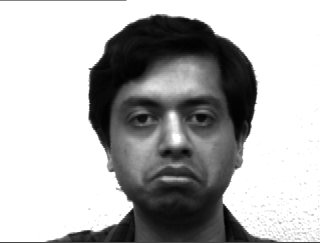

In [13]:
image=Image.open(test_image).convert('L')
image_np=np.array(image,'uint8')
image_np

In [14]:
image_np.shape

(243, 320)

In [15]:
prediction=lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [16]:
prediction[0]

10

In [17]:
expected_output=int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output


10

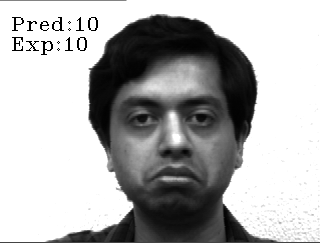

In [18]:
cv.putText(image_np,'Pred:'+str(prediction[0]),(10,30),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv.putText(image_np,'Exp:'+str(expected_output),(10,50),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(image_np)

##Evaluating the face Classifier


In [33]:
paths=[os.path.join(path+'/test',f)for f in os.listdir(path+'/test')]
# print(paths)
predictions=[]
expected_outputs=[]
for pathh in paths:
  image=Image.open(pathh).convert('L')
  image_np=np.array(image,'uint8')
  prediction,_=lbph_face_classifier.predict(image_np)
  expected_output=int(os.path.split(pathh)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)


In [34]:
type(predictions),type(expected_outputs)

(list, list)

In [35]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)

In [36]:
type(predictions),type(expected_outputs)

(numpy.ndarray, numpy.ndarray)

In [37]:
predictions

array([ 1,  1,  4,  5,  3,  9,  9,  4,  5,  5,  6, 14,  7,  9,  4,  8,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15,  7])

In [40]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.6666666666666666

In [42]:
len(predictions)


30

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(expected_outputs,predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

<Axes: >

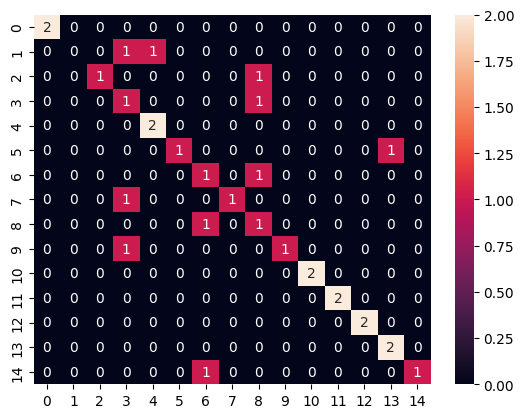

In [45]:
import seaborn as sns
sns.heatmap(cm,annot=True)

##DLIB

In [46]:
import dlib
import cv2 as cv
from google.colab.patches import cv2_imshow

##Detecting facial points

In [54]:
face_detector=dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


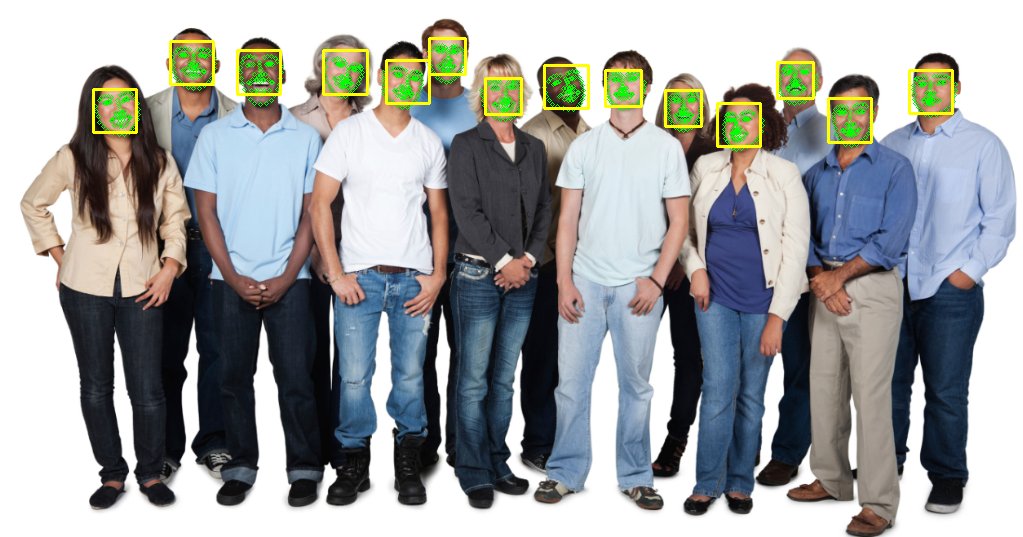

In [59]:
image=cv.imread('people2.jpg')
# image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
# cv2_imshow(image)
face_detection=face_detector(image,1)
for face in face_detection:
  points=points_detector(image,face)
  for point in points.parts():
    cv.circle(image,(point.x,point.y),2,(0,255,0),1)
  l,t,r,b=face.left(),face.top(),face.right(),face.bottom()
  cv.rectangle(image,(l,t),(r,b),(0,255,255),2)
cv2_imshow(image)

In [60]:
import os

In [61]:
face_descripter_extractor=dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-nt0qp_wr/dlib_f6dd7fd0cd604d96bd23030b28ee179d/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version